# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


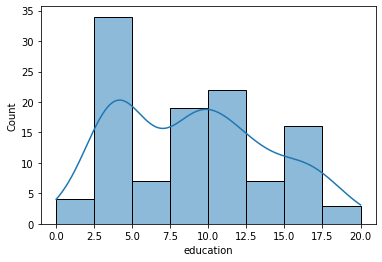

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['education'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Visualisar os dados

In [7]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

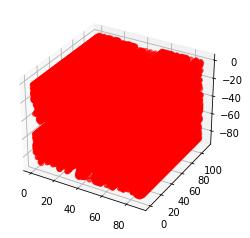

In [8]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

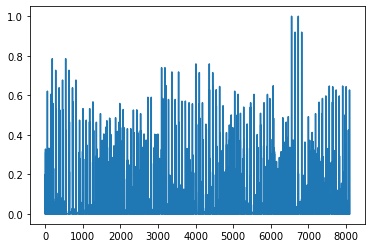

In [9]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [10]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_matr, test_matr = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')


#array([[1, 2, 3],
#       [4, 5, 6],
#       [7, 8, 9]])

train_mat=np.empty(shape=(112,4005))
test_mat=np.empty(shape=(28,4005))

for mat in range(len(train_matr)):
    train_mat[mat] = train_matr[mat][np.triu_indices(90, k = 1)]
    
for mat in range(len(test_matr)):
    test_mat[mat] = test_matr[mat][np.triu_indices(90, k = 1)]

print(test_mat)


dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)
[[0.         0.14089113 0.         ... 0.         0.19306904 0.        ]
 [0.         0.14729737 0.         ... 0.         0.27594885 0.        ]
 [0.         0.09172448 0.         ... 0.         0.26091532 0.        ]
 ...
 [0.         0.17966329 0.01368047 ... 0.         0.21333905 0.        ]
 [0.         0.19346361 0.         ... 0.         0.22222851 0.        ]
 [0.         0.12259173 0.         ... 0.         0.25970463 0.        ]]


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [11]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3832525608118417552
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7175953048609571628
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
#para melhor gestão memória GPU por parte do tensorflow

def set_keras_backend(backend):
    print("A acertar o backend e libertar memória da grafica")
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
    if backend == "tensorflow":
        # Allow memory growth for the GPU
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        print(physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)  
  
  
set_keras_backend("tensorflow")

A acertar o backend e libertar memória da grafica
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Embedding, BatchNormalization,Activation,Dropout, Input, concatenate,Conv1D,MaxPooling1D
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train2 = train_data.drop(['age','id'],axis=1)



inputs = Input(shape=(4005))




inputs2 = Input(shape = (2))

flat2 = Flatten()(inputs2)



concat = concatenate([inputs, flat2])

dense1 = Dense(256, activation='relu')(concat)
dense2 = Dense(256, activation='relu') (dense1)
dense3 = Dense(100, activation='relu') (dense2)
output = Dense(1, activation='relu') (dense3)

model = Model([inputs,inputs2], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 4005)]       0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 2)            0           input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 4007)         0           input_1[0][0]                    
                                                                 flatten[0][0]                

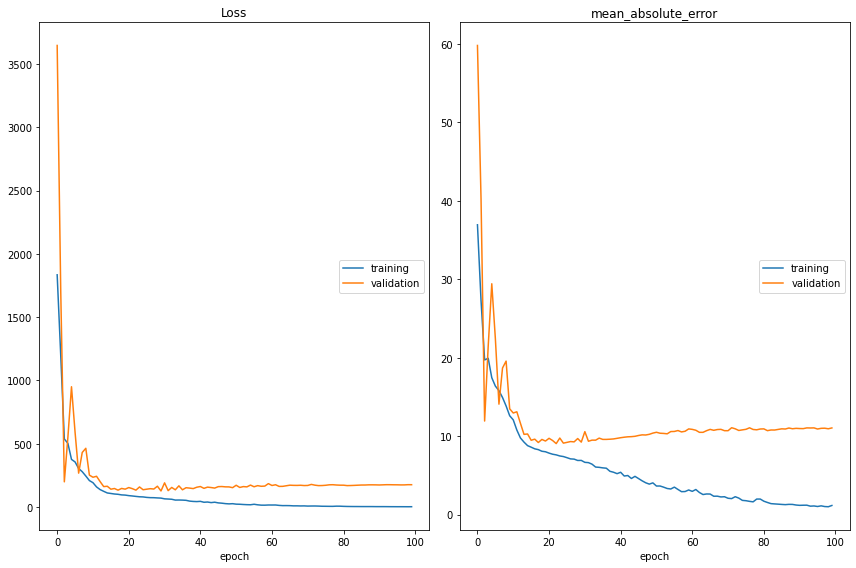

Loss
	training         	 (min:    1.980, max: 1835.051, cur:    2.159)
	validation       	 (min:  126.624, max: 3647.511, cur:  176.025)
mean_absolute_error
	training         	 (min:    1.011, max:   36.958, cur:    1.172)
	validation       	 (min:    9.061, max:   59.817, cur:   11.057)


In [14]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')





history = model.fit([x_train,x_train2], y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Usar o modelo

In [15]:
resultados_finais = model.predict([test_mat,test_data.drop(['id'],axis=1)])
print(resultados_finais)

[[21.32725 ]
 [20.391096]
 [16.636894]
 [20.025967]
 [21.83636 ]
 [27.74267 ]
 [52.410027]
 [44.964725]
 [45.63422 ]
 [74.159775]
 [66.808525]
 [70.354996]
 [88.50985 ]
 [84.37757 ]
 [19.312021]
 [18.675041]
 [16.337849]
 [27.790945]
 [21.406368]
 [25.882898]
 [49.15707 ]
 [59.559338]
 [56.022415]
 [99.28361 ]
 [54.695328]
 [65.488625]
 [65.36878 ]
 [79.17829 ]]


# Prepare submission

In [16]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(float(resultados_finais[i-1]))+'\n')
    